In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Bengaluru_House_Data.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


## Understanding the `dataset` and _cleaning_

In [3]:
df.shape

(13320, 9)

In [4]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [5]:
df.groupby('area_type')['area_type'].count()

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [6]:
df1 = df.drop(['society','availability'], axis=1)
df1.head()

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00


## Data Cleaning

In [7]:
df1['balcony'].fillna(value=0, inplace=True)

In [8]:
df1.isna().sum()

area_type      0
location       1
size          16
total_sqft     0
bath          73
balcony        0
price          0
dtype: int64

In [9]:
df2 = df1.dropna()
df2.isna().sum()

area_type     0
location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [10]:
df2.area_type.unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [11]:
df2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [12]:
df2['BHK'] = df2['size'].apply(lambda x: int(x.split(' ')[0]))

C:\Users\test\AppData\Local\Temp/ipykernel_1040/1853734267.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['BHK'] = df2['size'].apply(lambda x: int(x.split(' ')[0]))


In [13]:
df2.head()

,area_type,location,size,total_sqft,bath,balcony,price,BHK
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00,2


In [14]:
df2['BHK'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [15]:
df2[df2['BHK']>20]

,area_type,location,size,total_sqft,bath,balcony,price,BHK
1718,Super built-up Area,2Electronic City Phase II,27 BHK,8000,27.0,0.0,230.0,27
4684,Plot Area,Munnekollal,43 Bedroom,2400,40.0,0.0,660.0,43


In [16]:
df.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [17]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [18]:
df2[~df['total_sqft'].apply(is_float)].sample(10)

C:\Users\test\AppData\Local\Temp/ipykernel_1040/917002996.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2[~df['total_sqft'].apply(is_float)].sample(10)


,area_type,location,size,total_sqft,bath,balcony,price,BHK
11320,Plot Area,Arishinakunte,1 Bedroom,38Guntha,1.0,0.0,170.000,1
9736,Super built-up Area,Pragathi Nagar,1 BHK,799 - 803,1.0,0.0,33.645,1
5179,Super built-up Area,Rachenahalli,1 BHK,660 - 700,1.0,0.0,32.640,1
8871,Super built-up Area,Jalahalli East,1 BHK,750 - 800,1.0,0.0,34.100,1
5599,Super built-up Area,Hormavu,3 BHK,1469 - 1766,3.0,0.0,73.595,3
5382,Super built-up Area,Whitefield,1 BHK,524 - 894,1.0,0.0,34.735,1
5453,Plot Area,Kannur,6 Bedroom,3Cents,6.0,3.0,75.000,6
6987,Super built-up Area,Chandapura,2 BHK,598 - 958,2.0,0.0,25.290,2
12990,Super built-up Area,Talaghattapura,3 BHK,1804 - 2273,3.0,0.0,122.000,3
4113,Super built-up Area,BTM Layout,3 BHK,167Sq. Meter,3.0,2.0,10.000,3


In [19]:
def covert_range_sqft_to_float(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return ((float(tokens[0])+float(tokens[1]))/2)
    try:
        return float(x)
    except:
        return None

In [20]:
df3 = df2.copy()
df3['total_sqft'] = df.total_sqft.apply(covert_range_sqft_to_float)

In [21]:
df3.head(10)

,area_type,location,size,total_sqft,bath,balcony,price,BHK
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2
5,Super built-up Area,Whitefield,2 BHK,1170.0,2.0,1.0,38.00,2
6,Super built-up Area,Old Airport Road,4 BHK,2732.0,4.0,0.0,204.00,4
7,Super built-up Area,Rajaji Nagar,4 BHK,3300.0,4.0,0.0,600.00,4
8,Super built-up Area,Marathahalli,3 BHK,1310.0,3.0,1.0,63.25,3
9,Plot Area,Gandhi Bazar,6 Bedroom,1020.0,6.0,0.0,370.00,6


In [22]:
df4 = df3.copy()
df4['price_per_sqft'] = df4['price']*100000/df4['total_sqft']

In [23]:
df4.head()

,area_type,location,size,total_sqft,bath,balcony,price,BHK,price_per_sqft
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000


In [24]:
len(df.location.unique()),len(df4.area_type.unique())

(1306, 4)

In [25]:
df4.location = df4.location.apply(lambda x: x.strip())

In [26]:
location_stats = df4.groupby('location')['location'].count().sort_values(ascending=False)
location_stats

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [27]:
loaction_stat_less_10 = location_stats[location_stats<=10]

In [28]:
df4.location = df['location'].apply(lambda x: 'other' if x in loaction_stat_less_10 else x)
df4.sample(5)

,area_type,location,size,total_sqft,bath,balcony,price,BHK,price_per_sqft
1510,Built-up Area,Attibele,1 BHK,400.0,1.0,1.0,14.0,1,3500.000000
8672,Super built-up Area,Whitefield,2 BHK,1140.0,2.0,2.0,50.0,2,4385.964912
10348,Super built-up Area,Hegde Nagar,3 BHK,1930.0,4.0,2.0,122.0,3,6321.243523
11950,Super built-up Area,other,3 BHK,6729.0,4.0,0.0,900.0,3,13374.944271
4665,Super built-up Area,Thanisandra,1 BHK,662.0,1.0,1.0,42.0,1,6344.410876


## Finding Outlier in the data
### Assuming _Avarage_ sqft per room is `300`

In [29]:
df4[df4.total_sqft/df4.BHK < 300].head()

,area_type,location,size,total_sqft,bath,balcony,price,BHK,price_per_sqft
9,Plot Area,other,6 Bedroom,1020.0,6.0,0.0,370.0,6,36274.509804
45,Plot Area,HSR Layout,8 Bedroom,600.0,9.0,0.0,200.0,8,33333.333333
58,Plot Area,Murugeshpalya,6 Bedroom,1407.0,4.0,1.0,150.0,6,10660.980810
68,Plot Area,Devarachikkanahalli,8 Bedroom,1350.0,7.0,0.0,85.0,8,6296.296296
70,Plot Area,other,3 Bedroom,500.0,3.0,2.0,100.0,3,20000.000000


In [30]:
df4.shape

(13246, 9)

In [31]:
df5 = df4[~(df4.total_sqft/df4.BHK < 300)]
df5.head()

,area_type,location,size,total_sqft,bath,balcony,price,BHK,price_per_sqft
0,Super built-up Area,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Built-up Area,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Super built-up Area,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000


In [32]:
df5.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

## Outlier Removal Standard Deviation and Mean

### Here we find that min price per sqft is 267 rs/sqft whereas max is 12000000, this shows a wide variation in property prices. We should remove outliers per location using mean and one standard deviation

In [34]:
def outlier_removal(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

df6 = outlier_removal(df5)
df6.shape

(10201, 9)

In [35]:
df6.head()

,area_type,location,size,total_sqft,bath,balcony,price,BHK,price_per_sqft
0,Super built-up Area,Devarabeesana Halli,3 BHK,1672.0,3.0,2.0,150.0,3,8971.291866
1,Built-up Area,Devarabeesana Halli,3 BHK,1750.0,3.0,3.0,149.0,3,8514.285714
2,Super built-up Area,Devarabeesana Halli,3 BHK,1750.0,3.0,2.0,150.0,3,8571.428571
3,Super built-up Area,Devarachikkanahalli,3 BHK,1250.0,2.0,3.0,44.0,3,3520.000000
4,Super built-up Area,Devarachikkanahalli,2 BHK,1250.0,2.0,2.0,40.0,2,3200.000000


In [41]:
def plot_scartter(df, location):
     bhk2 = df[(df.location == location)&(df.BHK == 2)]
     bhk3 = df[(df.location == location)&(df.BHK == 3)]
     plt.rcParams['figure.figsize'] = (15,10)
     plt.scatter(bhk2.total_sqft,bhk2.price, color='blue',label='2 BHK',s=50)
     plt.scatter(bhk3.total_sqft,bhk3.price, color='red',label='3 BHK',s=50, marker='+')
     plt.xlabel("Total Square Feet Area")
     plt.ylabel("Price (Lakh Indian Rupees)")
     plt.title(location)
     plt.legend()

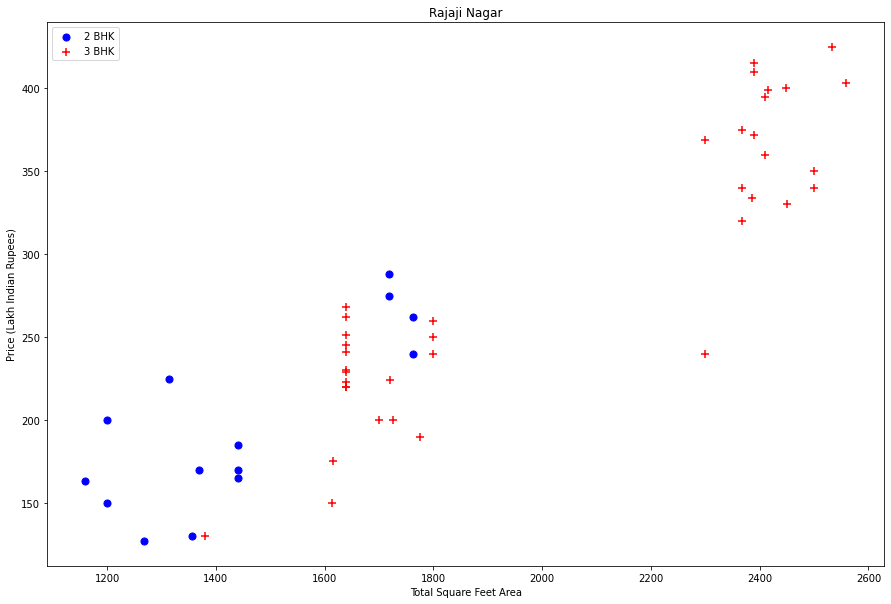

In [42]:
plot_scartter(df6,'Rajaji Nagar')

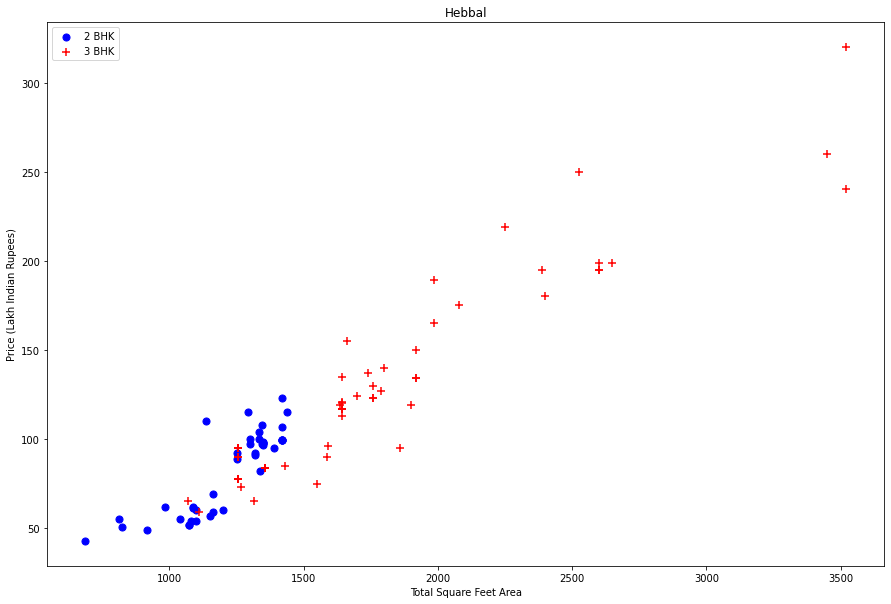

In [44]:
plot_scartter(df6,'Hebbal')

### Also remove properties where for same location, the price of (for example) 3 bedroom apartment is less than 2 bedroom apartment (with same square ft area). What we will do is for a given location, we will build a dictionary of stats per bhk, i.e.
{
    '1' : {
        'mean':4000,
        'std' : 2000,
        'count' : 34
    },
    '2' : {
        'mean' : 4300,
        'std' : 2300,
        'count' : 22
    }
}

In [46]:
{
    '1' : {
        'mean':4000,
        'std' : 2000,
        'count' : 34
    },
    '2' : {
        'mean' : 4300,
        'std' : 2300,
        'count' : 22
    }
}

{'1': {'mean': 4000, 'std': 2000, 'count': 34},
 '2': {'mean': 4300, 'std': 2300, 'count': 22}}

In [51]:
def remove_BHK_outlier(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby("BHK"):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('BHK'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices, axis='index')

df7 = remove_BHK_outlier(df6)

Text(0, 0.5, 'Count')

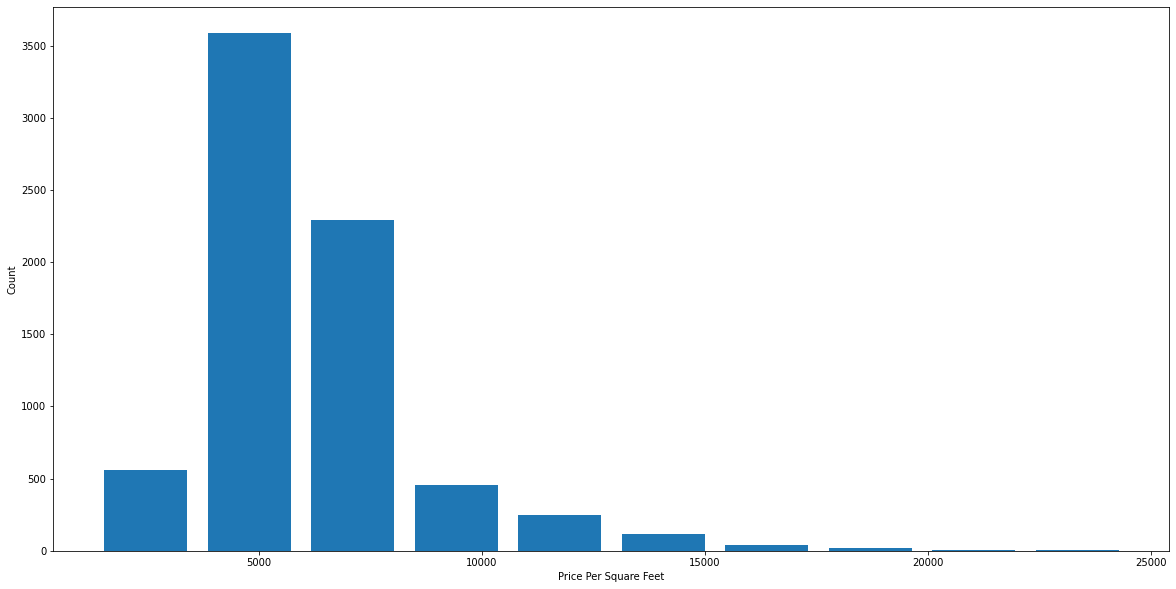

In [52]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df7.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

## Outlier Removal Using Bathrooms Feature

In [53]:
df7.bath.unique()

array([ 3.,  2.,  1.,  4.,  5.,  8.,  6.,  7.,  9., 12., 16., 13.])

Text(0, 0.5, 'Count')

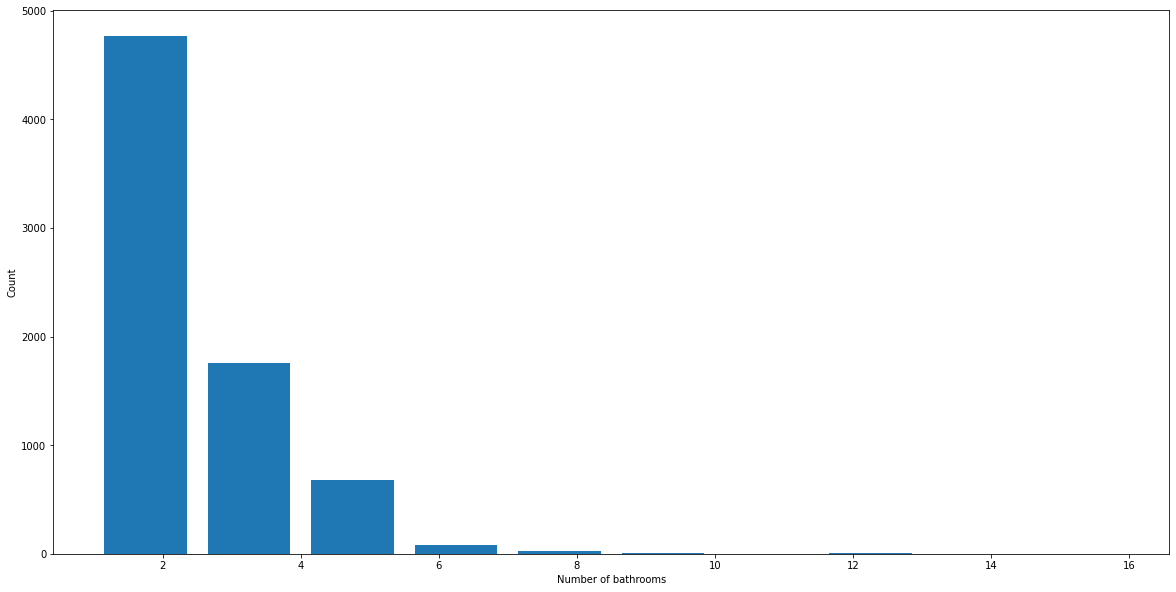

In [55]:
plt.hist(df7.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [57]:
df7[df7.bath>10]

,area_type,location,size,total_sqft,bath,balcony,price,BHK,price_per_sqft
5292,Super built-up Area,Neeladri Nagar,10 BHK,4000.0,12.0,0.0,160.0,10,4000.000000
8497,Super built-up Area,other,10 BHK,12000.0,12.0,0.0,525.0,10,4375.000000
8583,Super built-up Area,other,16 BHK,10000.0,16.0,0.0,550.0,16,5500.000000
9296,Super built-up Area,other,11 BHK,6000.0,12.0,0.0,150.0,11,2500.000000
9618,Super built-up Area,other,13 BHK,5425.0,13.0,0.0,275.0,13,5069.124424


In [58]:
df7[df7.bath>df7.BHK + 2]

,area_type,location,size,total_sqft,bath,balcony,price,BHK,price_per_sqft
1647,Built-up Area,Chikkabanavar,4 Bedroom,2460.0,7.0,2.0,80.0,4,3252.032520
5253,Built-up Area,Nagasandra,4 Bedroom,7000.0,8.0,0.0,450.0,4,6428.571429
6733,Super built-up Area,Thanisandra,3 BHK,1806.0,6.0,2.0,116.0,3,6423.034330
8427,Super built-up Area,other,6 BHK,11338.0,9.0,1.0,1000.0,6,8819.897689


## Again the business manager has a conversation with you (i.e. a data scientist) that if you have 4 bedroom home and even if you have bathroom in all 4 rooms plus one guest bathroom, you will have total bath = total bed + 1 max. Anything above that is an outlier or a data error and can be removed

In [60]:
df8 = df7[df7.bath<df7.BHK+2]
df8.shape

(7246, 9)

In [61]:
df9 = df8.drop(['size','price_per_sqft'],axis='columns')
df9.head(3)

,area_type,location,total_sqft,bath,balcony,price,BHK
0,Super built-up Area,Devarabeesana Halli,1672.0,3.0,2.0,150.0,3
1,Built-up Area,Devarabeesana Halli,1750.0,3.0,3.0,149.0,3
2,Super built-up Area,Devarabeesana Halli,1750.0,3.0,2.0,150.0,3


# One Hot Encoding For Categorical Data

In [63]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df10 = df9.copy()

In [67]:
df10.area_type = le.fit_transform(df10.area_type)
df10.location = le.fit_transform(df10.location)

In [68]:
df10.head()

,area_type,location,total_sqft,bath,balcony,price,BHK
0,3,0,1672.0,3.0,2.0,150.0,3
1,0,0,1750.0,3.0,3.0,149.0,3
2,3,0,1750.0,3.0,2.0,150.0,3
4,3,1,1250.0,2.0,2.0,40.0,2
5,2,1,1200.0,2.0,2.0,83.0,2


In [70]:
len(df10.location.unique()), len(df9.location.unique())

(260, 260)

In [71]:
len(df10.area_type.unique()), len(df9.area_type.unique())

(4, 4)